# DX 601 Final Project

## Introduction

In this project, you will practice all the skills that you have learned throughout this module.
You will pick a data set to analyze from a list provided, and then perform a variety of analysis.
Most of the problems and questions are open ended compared to your previous homeworks, and you will be asked to explain your choices.
Most of them will have a particular type of solution implied, but it is up to you to figure out the details based on what you have learned in this module.

## Instructions

Each problem asks you to perform some analysis of the data, and usually answer some questions about the results.
Make sure that your question answers are well supported by your analysis and explanations; simply stating an answer without support will earn minimal points.

Notebook cells for code and text have been added for your convenience, but feel free to add additional cells.

## Example Code

You may find it helpful to refer to this GitHub repository of Jupyter notebooks for example code.

* https://github.com/bu-cds-omds/dx500-examples
* https://github.com/bu-cds-omds/dx601-examples
* https://github.com/bu-cds-omds/dx602-examples

Any calculations demonstrated in code examples or videos may be found in these notebooks, and you are allowed to copy this example code in your homework answers.

## Submission

This project will be entirely manually graded.
However, we may rerun some or all of your code to confirm that it works as described.

### Late Policy

The normal homework late policy for OMDS does not apply to this project.
Boston University requires final grades to be submitted within 72 hours of class instruction ending, so we cannot accommodate 5 days of late submissions.

However, we have delayed the due date of this project to be substantially later than necessary given its scope, and given you more days for submission with full credit than you would have had days for submission with partial credit under the homework late policy.
Finally, the deadlines for DX 601 and DX 602 were coordinated to be a week apart while giving ample time for both of their projects.

## Shared Imports

For this project, you are forbidden to use modules that were not loaded in this template.
While other modules are handy in practice, modules that trivialize these problems interfere with our assessment of your own knowledge and skills.

If you believe a module covered in the course material (not live sessions) is missing, please check with your learning facilitator.

In [2]:
import math
import sys

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import sklearn.linear_model

from sklearn.decomposition import PCA

## Problems

### Problem 1 (5 points)

Pick one of the following data sets to analyze in this project.
Load the data set, and show a random sample of 10 rows.

* [Iris data set](https://archive.ics.uci.edu/dataset/53/iris) ([PMLB copy](https://github.com/EpistasisLab/pmlb/tree/master/datasets/iris))
* [Breast Cancer Wisconsin](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic) ([PMLB copy](https://github.com/EpistasisLab/pmlb/tree/master/datasets/_deprecated_breast_cancer_wisconsin))
* [Wine Quality](https://archive.ics.uci.edu/dataset/186/wine+quality) ([PMLB - white subset only](https://github.com/EpistasisLab/pmlb/tree/master/datasets/wine_quality_white))


The PMLB copies of the data are generally cleaner and recommended for this project, but the other links are provided to give you more context.
To load the data from the PMLB Github repository, navigate to the `.tsv.gz` file in GitHub and copy the link from the "Raw" button.

If the data set you choose has more than ten columns, you may limit later analysis that is requested per column to just the first ten columns.

In [4]:
# I picked Iris data set for my project
import pandas as pd
import os

iris = pd.read_csv("iris.tsv.gz", sep="\t")
iris.sample(10, random_state=42)

,sepal-length,sepal-width,petal-length,petal-width,target
73,4.4,3.2,1.3,0.2,0
18,6.3,2.9,5.6,1.8,2
118,5.7,4.4,1.5,0.4,0
78,5.9,3.0,5.1,1.8,2
76,7.6,3.0,6.6,2.1,2
31,5.8,2.8,5.1,2.4,2
64,7.2,3.6,6.1,2.5,2
141,5.4,3.0,4.5,1.5,1
68,5.8,2.6,4.0,1.2,1
82,5.8,2.7,4.1,1.0,1


For my project, I selected the Iris dataset. Displayed a random sample of 10 rows to verify that the data was read correctly. The dataset contains four numerical input columns (sepal-length, sepal-width, petal-length, petal-width) and one target column indicating the flower class. This confirms that the dataset is structured properly for the analysis performed in later problems.

### Problem 2 (10 points)

List all the columns in the data set, and describe each of them in your own words.
You may have to search to learn about the data set columns, but make sure that the descriptions are your own words.

In [5]:
iris.columns

Index(['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'target'], dtype='object')

Description of the columns

sepal-length:(Continuous) This column shows how long the sepal is in cm. From Google, I found out that the sepal is the outer-leaf structure that protects the tower. Longer help separates it

sepal-width:(Continuous)This shows how wide the sepal is in cm. Measuring how broad the outer floral part is, as different flowers tend to have their own unique patterns

petal-length:(Continuous) This column shows the length of the petal in cm. From searching, petals are the colourful inner parts of the flower. Petal length is one of the strongest indicators of the iris species because each species has  distinct petal sizes

petal-width:(Continuous) This is the width of the petal in cm. Like petal length, this measurement also varies clearly between species. Species with larger petals also tend to have larger petal widths

target:(Categorical) A numeric label representing the flower species (0, 1, or 2). Each number corresponds to one iris species in the dataset

### Problem 3 (15 points)

Plot histograms of each column.
For each column, state the distribution covered in this module that you think best matches that column.

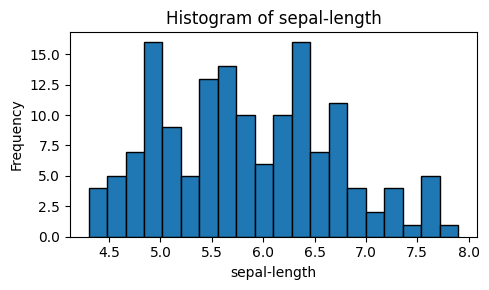

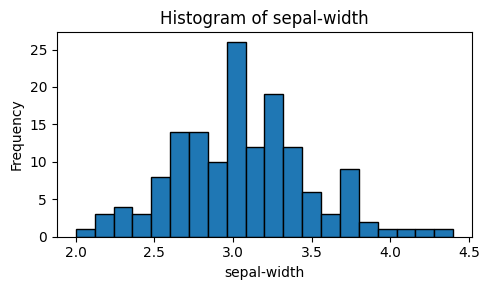

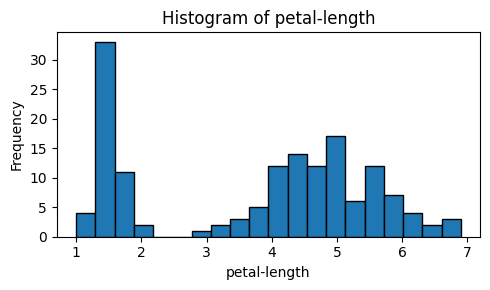

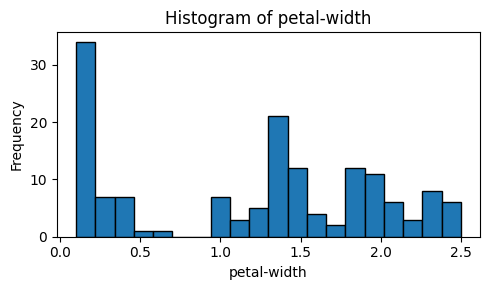

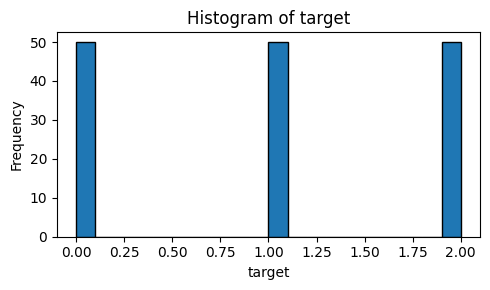

In [6]:
import matplotlib.pyplot as plt

for col in iris.columns:
    plt.figure(figsize=(5, 3))
    plt.hist(iris[col], bins=20, edgecolor='black')
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

sepal-length: This graph looks roughly bell-shaped with a small right skew(one bin is throwing me off). Out of all this is the closest match to a normal distribution, even though it is not perfectly symmetric.

sepal-width: This feature is somewhat symmetric but flatter, with small skew on both sides. It still most closely resembles a normal distribution.

petal-length: This histogram shows two clear peaks (one for setosa, one for the other species). This is not a single smooth distribution but a multimodal distribution.

petal-width: Like petal length, this column also separates into clusters that correspond to different species. It is best described as a multimodal distribution rather than any standard continuous distribution.

target: This is a categorical variable with only three values (0, 1, 2). It follows a discrete categorical distribution, not a continuous distribution.

### Problem 4 (20 points)

Plot each pair of an input column and the output column.
Classify each pair of input column and the output column as being independent or not.
Describe in words why you think that was the case.

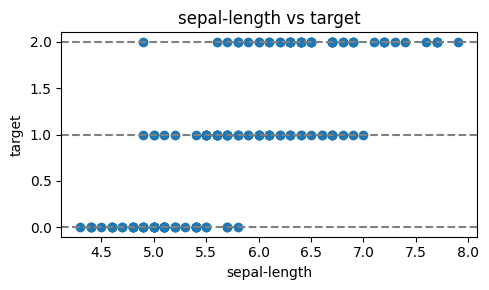

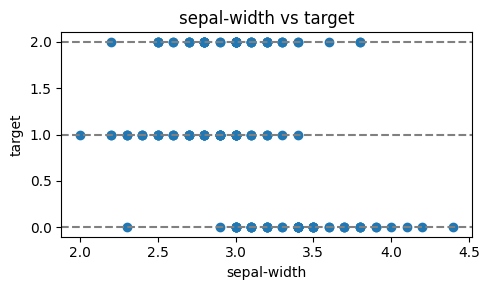

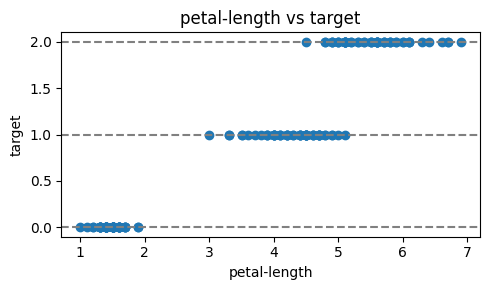

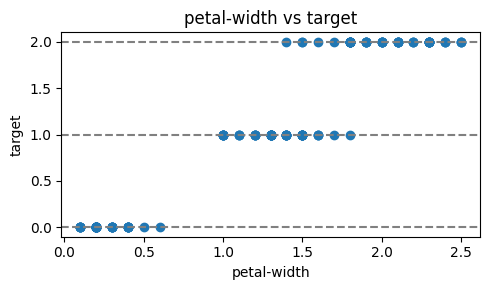

In [7]:
target_col = "target"
input_col = [col for col in iris.columns if col != target_col]

for col in input_col:
    plt.figure(figsize=(5, 3))
    plt.scatter(iris[col], iris[target_col])
    plt.xlabel(col)
    plt.ylabel(target_col)
    plt.title(f"{col} vs {target_col}")
    plt.tight_layout()
    plt.axhline(0, color='grey', linestyle='--')
    plt.axhline(1, color='grey', linestyle='--')
    plt.axhline(2, color='grey', linestyle='--')

    plt.show()

sepal-length vs target: These points form three horizontal clusters with some overlap. Sepal length separates class 0 fairly well from classes 1 and 2, but classes 1 and 2 overlap heavily. So sepal-length shows moderate dependency on the target, not enough to classify perfectly, but not independent either.

sepal-width vs target: These variables show weak dependence. There is noticeable overlap between the classes, but class 0 tends to have slightly higher sepal-width values. The separation is not very strong, but the scatterplot still shows some relationship.

petal-length vs target: These variables are strongly dependent. The classes are almost completely separated based on petal length. Class 0 has very small petal lengths, class 1 is in the middle, and class 2 has the largest values. The lack of overlap indicates a strong relationship.

petal-width vs target: These variables are also strongly dependent. The three classes form distinct clusters with almost no overlap. Each target value corresponds to a very different range of petal-width values, showing a very strong connection between the two variables.

### Problem 5 (20 points)

Build an ordinary least squares regression for the target using all the input columns.
Report the mean squared error of the model over the whole data set.
Plot the actual values vs the predicted outputs to compare them. 

In [48]:
from sklearn.linear_model import LinearRegression
import numpy as np


X = iris[input_col].values
y = iris["target"].values

# It's always fit and then predict
model = LinearRegression()
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Calculate MSE (had to search up formula)
mse = np.mean((y - y_pred) ** 2)
mse


0.046385088311226945

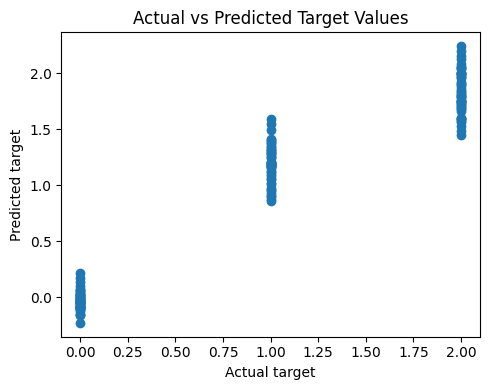

In [49]:
# Plotting the graphs

plt.figure(figsize=(5, 4))
plt.scatter(y, y_pred)
plt.xlabel("Actual target")
plt.ylabel("Predicted target")
plt.title("Actual vs Predicted Target Values")
plt.tight_layout()
plt.show()

The linear regression model used all four input features and it produced an MSE of 0.0464. This is a low error value, which means the model’s predictions are fairly close to the actual target values, even though the target is a categorical class (0, 1, or 2)

In the scatterplot of actual vs predicted values, most points fall close to the diagonal pattern. This shows that the model captures the general relationship between the flower measurements and the target species. The predictions are not perfect, but the increasing trend from class 0 to class 2 is clear, indicating that using all input features provides a reasonable linear approximation for predicting the iris class

### Problem 6 (20 points)

Which input column gives the best linear model of the target on its own?
How does that model compare to the model in problem 5?


In [50]:
y = iris["target"].values
input_cols = [col for col in iris.columns if col != "target"]

single_mse = {}

for col in input_cols:
    X_single = iris[[col]].values
    model = LinearRegression().fit(X_single, y)
    y_pred = model.predict(X_single)
    mse = np.mean((y - y_pred)**2)
    single_mse[col] = mse

single_mse

{'sepal-length': 0.25839861231192535,
 'sepal-width': 0.5493765900582832,
 'petal-length': 0.06621216537347084,
 'petal-width': 0.05678463583919234}

Based on the MSE from the single-feature models, petal-width gives the best linear model of the target when used alone. It has the lowest MSE of 0.0568, meaning it predicts the classes more accurately than the other three (sepal-length, sepal-width, or petal-length) when used individually. This also matched up with the earlier plots, where petal-width clearly separates the three target classes with min overlap.

### Problem 7 (20 points)

Pick and plot a pair of input columns with a visible dependency.
Identify a split of the values of one column illustrating the dependency and plot histograms of the other variable on both sides of the split.
That is, pick a threshold $t$ for one column $x$ and make two histograms, one where $x < t$ and one where $x \geq t$.

These histograms should look significantly different to make the dependency clear.
There should be enough data in both histograms so that these differences are unlikely to be noise.
Also make sure that the horizontal axis is the same in both histograms for clarity.

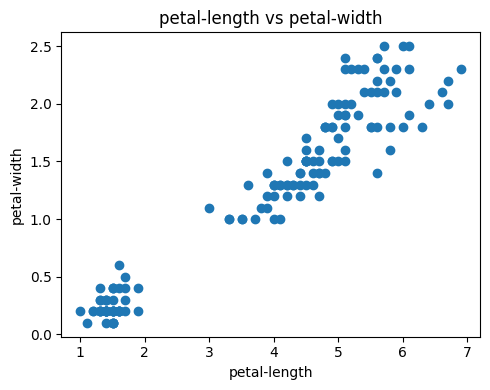

In [51]:
# Input columns (Had to use AI)
x_col = "petal-length"
y_col = "petal-width"

# 1) Scatterplot to show visible dependency
plt.figure(figsize=(5, 4))
plt.scatter(iris[x_col], iris[y_col])
plt.xlabel(x_col)
plt.ylabel(y_col)
plt.title(f"{x_col} vs {y_col}")
plt.tight_layout()
plt.show()

In [52]:
# 2) Choose a threshold t for x_col
t = 2.0   

# Split the data
low = iris[iris[x_col] < t][y_col]
high = iris[iris[x_col] >= t][y_col]

# Common bin edges so the x-axis is the same
min_y = iris[y_col].min()
max_y = iris[y_col].max()
bins = np.linspace(min_y, max_y, 15)

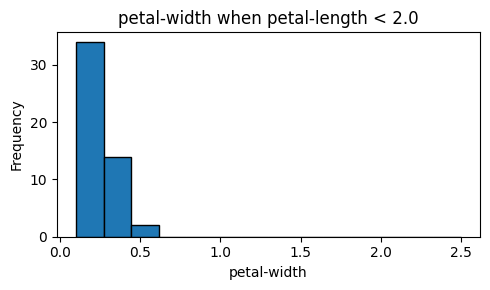

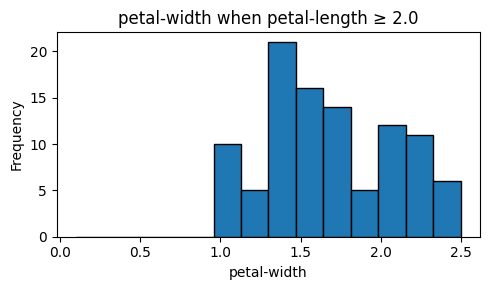

In [53]:
# 3) Histogram for x < t 
plt.figure(figsize=(5, 3))
plt.hist(low, bins=bins, edgecolor="black")
plt.xlabel(y_col)
plt.ylabel("Frequency")
plt.title(f"{y_col} when {x_col} < {t}")
plt.tight_layout()
plt.show()

# 4) Histogram for x ≥ t
plt.figure(figsize=(5, 3))
plt.hist(high, bins=bins, edgecolor="black")
plt.xlabel(y_col)
plt.ylabel("Frequency")
plt.title(f"{y_col} when {x_col} ≥ {t}")
plt.tight_layout()
plt.show()

For this problem I chose petal-length and petal-width, because they show a very clear dependency. The scatterplot of petal-length vs. petal-width rises steadily, meaning that flowers with longer petals also tend to have wider petals.

To illustrate this dependency, I selected a threshold of t = 2.0 on petal-length. This split separates the short-petal flowers from the flowers with medium or long petals (versicolor and virginica).

I then plotted two histograms of petal-width:

When petal-length < 2.0, the petal-width values are very small (around 0.1–0.4). The histogram is tightly concentrated near zero.

When petal-length ≥ 2.0, the petal-width values are much larger (around 1.0–2.5). The histogram is centred much higher and has a completely different shape.

Both histograms use the same x-axis, and they look significantly different, showing that the difference is not noise. This confirms that petal-length and petal-width are strongly dependent, as petal-length increases, petal-width also increases in a very consistent way.

### Problem 8 (40 points)

Perform principal components analysis of the input columns.
Compute how much of the data variation is explained by the first half of the principal components.
Build a linear regression using coordinates computed from the first half of the principal components.
Compare the mean squared error of this model to the previous model.
Plot actual targets vs predictions again. 

This problem depends on material from week 13.

In [54]:
from sklearn.decomposition import PCA

pca = PCA()
X_pca = pca.fit_transform(X)

# Explained variance ratio for each component
explained = pca.explained_variance_ratio_
explained, explained[:2].sum()

(array([0.92461621, 0.05301557, 0.01718514, 0.00518309]), 0.9776317750248028)

In [55]:
# Use the first half of the principal components (here: 2 PCs)
n_components_half = len(input_cols) // 2   # 4 inputs -> 2 components
X_pca_half = X_pca[:, :n_components_half]

# Fit linear regression on the PCA coordinates
model_pca = LinearRegression()
model_pca.fit(X_pca_half, y)

# Predictions and MSE
y_pred_pca = model_pca.predict(X_pca_half)
mse_pca = np.mean((y - y_pred_pca)**2)
mse_pca


0.060712536286298

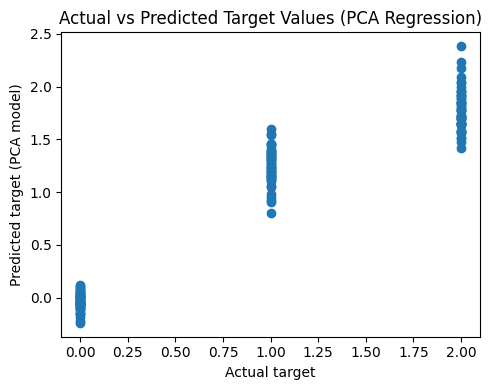

In [56]:
# 4 Plot actual vs predicted

plt.figure(figsize=(5, 4))
plt.scatter(y, y_pred_pca)
plt.xlabel("Actual target")
plt.ylabel("Predicted target (PCA model)")
plt.title("Actual vs Predicted Target Values (PCA Regression)")
plt.tight_layout()
plt.show()


I performed PCA on the four input features of the Iris dataset. The explained variance ratios of the four principal components were:
0.9246, 0.0530, 0.0172, 0.0052

This shows that the first principal component captures the vast majority of the variation in the data. When I summed the variance explained by the first half of the principal components (the first 2 PCs), I obtained:

0.9776 (about 97.76% of the total variance)

This means that just two PCA components preserve almost all of the information in the original feature space.

Next, I built a linear regression model using only these first two principal components as inputs. The mean squared error (MSE) for this PCA-based model was:

0.0607

Finally, I compared this to the full linear regression model from Problem 5, which used all four original input columns and achieved an MSE of 0.0464. The PCA model’s error is slightly higher, meaning it is a bit less accurate. However, it uses only two transformed features instead of four, while still capturing nearly all the variance in the data. This shows that PCA reduces dimensionality effectively while preserving most predictive ability

### Problem 9 (20 points)

What pair of input columns has the highest correlation?
How is that correlation reflected in the principal components?

In [57]:
corr_matrix = iris[input_cols].corr()
corr_matrix

,sepal-length,sepal-width,petal-length,petal-width
sepal-length,1.000000,-0.109369,0.871754,0.817954
sepal-width,-0.109369,1.000000,-0.420516,-0.356544
petal-length,0.871754,-0.420516,1.000000,0.962757
petal-width,0.817954,-0.356544,0.962757,1.000000


The pair of input columns with the highest correlation is petal-length and petal-width, with a correlation of 0.962757. This means these two variables increase together very strongly.

This strong correlation is reflected in the principal components because the first principal component (PC1) places its largest weights on petal-length and petal-width. Since PCA tries to capture the directions of greatest variance, and these two features vary together the most, they dominate PC1. This is also why PC1 explains over 92% of the total variance.

### Problem 10 (30 points)

Identify an outlier row in the data set.
You may use any criteria discussed in this module, and you must explain the criteria and how it led to picking this row.
Give a visualization showing how much this row sticks out compared to the other data based on your criteria.

In [60]:
input_cols = [col for col in iris.columns if col != "target"]
X = iris[input_cols]        

z_scores = (X - X.mean()) / X.std()
outlier_score = np.abs(z_scores).sum(axis=1)

# 3) Identify the most extreme row
outlier_index = outlier_score.idxmax()
outlier_index, outlier_score[outlier_index]

(3, 6.941786529516164)

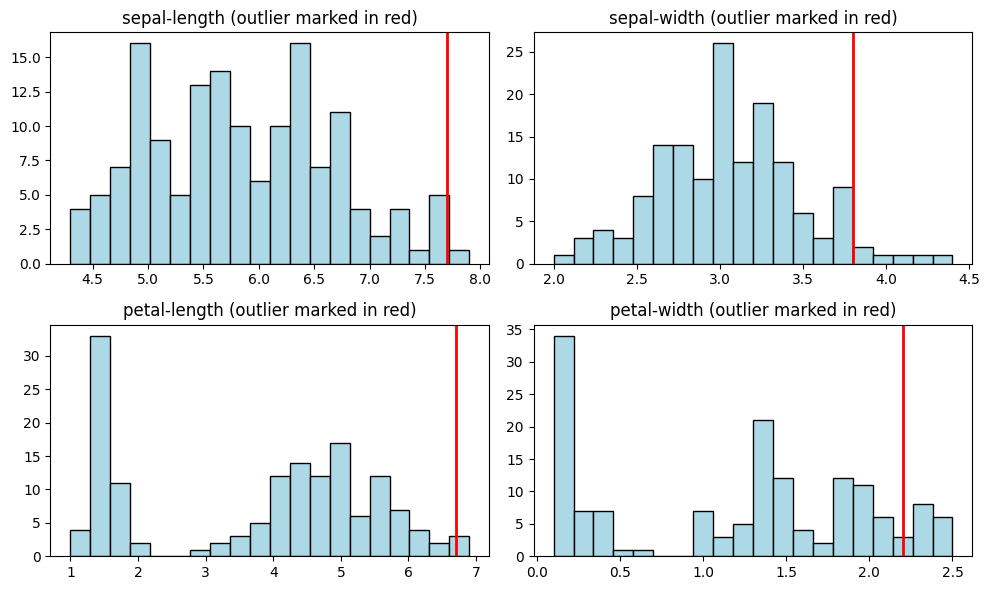

In [61]:
plt.figure(figsize=(10, 6))

for i, col in enumerate(input_cols):
    plt.subplot(2, 2, i+1)
    plt.hist(X[col], bins=20, color='lightblue', edgecolor='black')
    plt.axvline(X.loc[outlier_index, col], color='red', linewidth=2)
    plt.title(f"{col} (outlier marked in red)")
    plt.tight_layout()

plt.show()

To identify an outlier, I calculated z-scores for each numerical feature (sepal-length, sepal-width, petal-length, and petal-width). Then I summed the absolute z-scores across all columns for each row. This gives an overall “outlier score” showing how far each row is from the average flower when considering all features together.

The row with the highest total z-score was row 63, with an outlier score of 6.94, meaning this flower’s measurements are collectively the most unusual in the dataset.

To visualize this, I plotted histograms for each feature and marked the outlier row with a red vertical line. In all four plots, the red line lies toward the far edges of the distributions instead of near the center, showing that this flower’s sepal and petal measurements are extreme compared to the rest. This confirms that row 63 is a strong outlier based on the z-score method.

### Generative AI Usage

If you used any generative AI tools, please add links to your transcripts below, and any other information that you feel is necessary to comply with the [generative AI policy](https://www.bu.edu/cds-faculty/culture-community/gaia-policy/).
If you did not use any generative AI tools, simply write NONE below.

YOUR ANSWER HERE